# dataset
- http://www.cis.upenn.edu/~jshi/ped_html/ 52MB /media/sdb/CVDataset/ObjectDetection/PennFudanPed Penn-Fudan Database for Pedestrian Detection and Segmentation
- http://www.cvlibs.net/datasets/kitti/eval_object.php?obj_benchmark=2d 12GB(dowqloaded in /media/sdb/CVDataset/ObjectDetection/KITTI)
- http://cocodataset.org/#download /media/sdb/CVDataset/ObjectSegmentation/coco

In [3]:
import sys
sys.path.insert(0,os.path.expanduser('~/git/torchdet'))
print(sys.path)

import os
os.chdir(os.path.expanduser('~/git/torchdet'))

['/home/yzbx/git/torchdet', '/home/yzbx/git/torchdet', '', '/home/yzbx/git/torchdet/notebooks', '/home/yzbx/git/gnu/models/research', '/home/yzbx/git/gnu/models/research/slim', '/home/yzbx/bin/miniconda3/envs/cuda10.0/lib/python36.zip', '/home/yzbx/bin/miniconda3/envs/cuda10.0/lib/python3.6', '/home/yzbx/bin/miniconda3/envs/cuda10.0/lib/python3.6/lib-dynload', '/home/yzbx/.local/lib/python3.6/site-packages', '/home/yzbx/bin/miniconda3/envs/cuda10.0/lib/python3.6/site-packages', '/home/yzbx/bin/miniconda3/envs/cuda10.0/lib/python3.6/site-packages/pycocotools-2.0-py3.6-linux-x86_64.egg', '/home/yzbx/bin/miniconda3/envs/cuda10.0/lib/python3.6/site-packages/matplotlib-3.1.0-py3.6-linux-x86_64.egg', '/home/yzbx/bin/miniconda3/envs/cuda10.0/lib/python3.6/site-packages/kiwisolver-1.1.0-py3.6-linux-x86_64.egg', '/home/yzbx/bin/miniconda3/envs/cuda10.0/lib/python3.6/site-packages/cycler-0.10.0-py3.6.egg', '/home/yzbx/bin/miniconda3/envs/cuda10.0/lib/python3.6/site-packages/IPython/extensions', 

# coco2014 dataset
- [702, 16128, 31183, 21293, 10012, 2799, 536, 103, 21, 3, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0]

In [20]:
import numpy as np
from tqdm import trange
from dataset.det2seg import get_dataset
import matplotlib.pyplot as plt
from easydict import EasyDict as edict

config=edict()
config.dataset_name='coco2014'
config.root_path='dataset/coco'
split='train'

d=get_dataset(config,split)

count=[0 for i in range(20)]

for i in trange(len(d)):
    data=d.__getitem__(i)
    max_idx=np.max(data['overlap_map'].data.cpu().numpy())
    if max_idx<20:
        count[max_idx]+=1
    else:
        count[-1]+=1

print(count)

100%|██████████| 82783/82783 [2:25:46<00:00, 10.01it/s]  

[702, 16128, 31183, 21293, 10012, 2799, 536, 103, 21, 3, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0]


# PennFudanPed dataset
- [0, 71, 41, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [7]:
from dataset.det2seg import get_dataset
import matplotlib.pyplot as plt
from easydict import EasyDict as edict
import torch
from IPython import get_ipython
ipython = get_ipython()

# ipython.magic("pylab widgetsnbextension")
ipython.magic("load_ext autoreload")
ipython.magic("autoreload 2")
from dataset.PennFudanPed import PennFudanDataset

d=PennFudanDataset(root=os.path.expanduser('~/cvdataset/PennFudanPed'),transforms=None)

for i in range(5):
    sample=d.__getitem__(i)
    print(sample['annot'],sample['annot'].dtype,torch.from_numpy(sample['annot']))
    print(np.max(sample['img']),np.min(sample['img']),sample['img'].dtype)
    
config=edict()
config.dataset_name='PennFudanPed'
config.root_path=os.path.expanduser('~/cvdataset/PennFudanPed')
split='train'

d=get_dataset(config,split)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
[[ 43.  77. 149. 388.   1.]
 [184.  88. 278. 372.   1.]] float32 tensor([[ 43.,  77., 149., 388.,   1.],
        [184.,  88., 278., 372.,   1.]])
1.0 0.0 float32
[[ 55.  65. 158. 359.   1.]
 [192.  58. 288. 351.   1.]] float32 tensor([[ 55.,  65., 158., 359.,   1.],
        [192.,  58., 288., 351.,   1.]])
1.0 0.0 float32
[[ 42.  88. 152. 363.   1.]
 [188.  55. 282. 348.   1.]
 [430.  36. 567. 348.   1.]
 [383.  46. 454. 222.   1.]] float32 tensor([[ 42.,  88., 152., 363.,   1.],
        [188.,  55., 282., 348.,   1.],
        [430.,  36., 567., 348.,   1.],
        [383.,  46., 454., 222.,   1.]])
1.0 0.0 float32
[[ 64.  31. 144. 326.   1.]
 [180.  68. 261. 307.   1.]] float32 tensor([[ 64.,  31., 144., 326.,   1.],
        [180.,  68., 261., 307.,   1.]])
1.0 0.0 float32
[[102.  83. 269. 369.   1.]] float32 tensor([[102.,  83., 269., 369.,   1.]])
1.0 0.0 float32


In [9]:
import numpy as np
from tqdm import trange
count=[0 for i in range(20)]

for i in trange(len(d)):
    data=d.__getitem__(i)
    max_idx=np.max(data['overlap_map'].data.cpu().numpy())
    if max_idx<20:
        count[max_idx]+=1
    else:
        count[-1]+=1

print(count)

100%|██████████| 113/113 [00:09<00:00, 12.27it/s]

[0, 71, 41, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


# image boundary and distance tranform
- boundary distance
- boundary offset

['dataset/vis/label1.png', 'dataset/vis/label3.jpg', 'dataset/vis/label4.png', 'dataset/vis/label2.png']


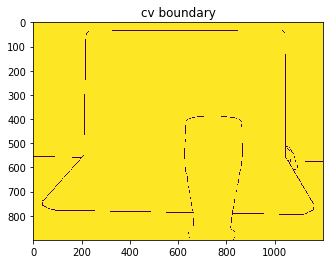

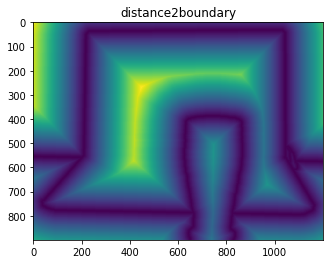

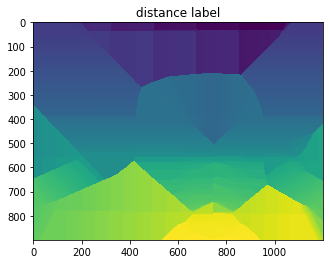

[0 1 2 3 4 5]


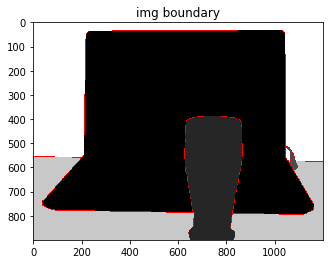

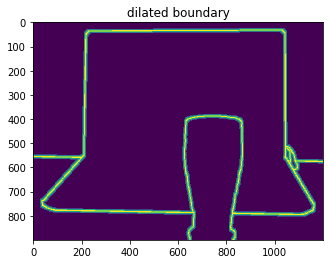

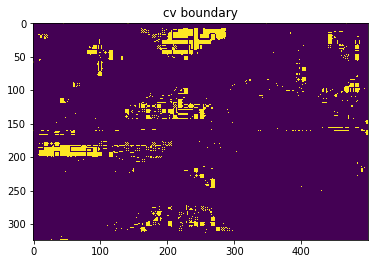

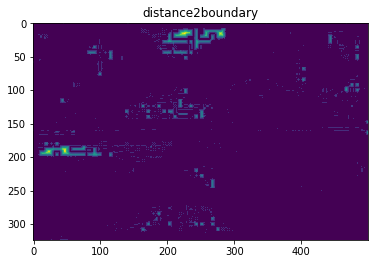

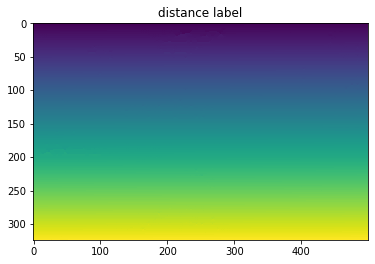

[1 2 3 4 5]


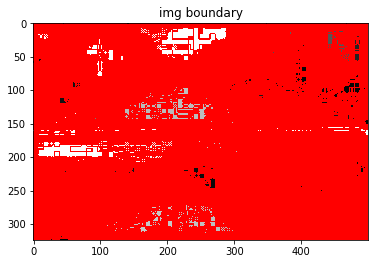

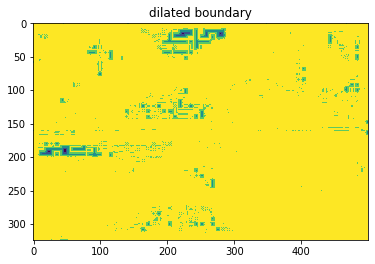

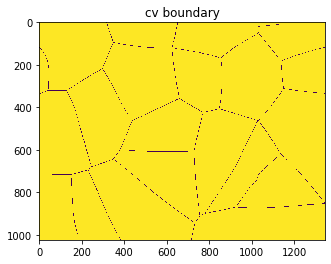

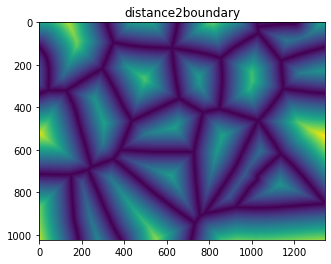

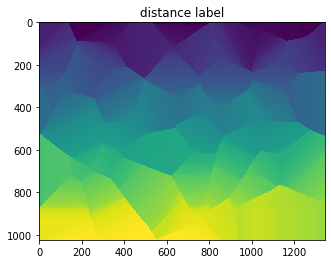

[0 1 2 3 4 5]


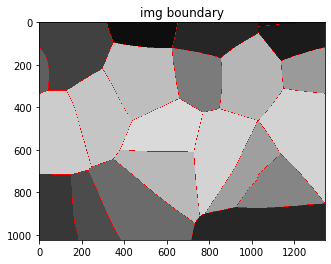

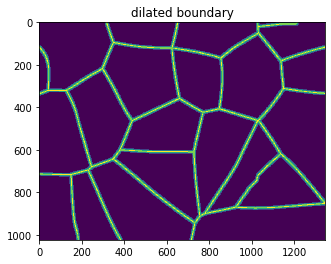

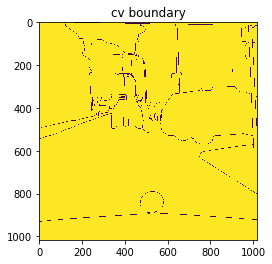

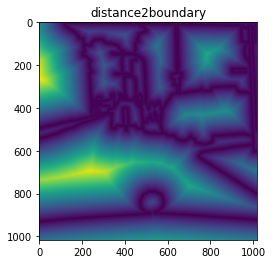

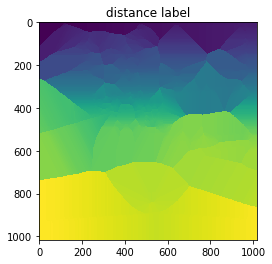

[0 1 2 3 4 5]


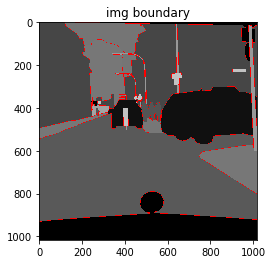

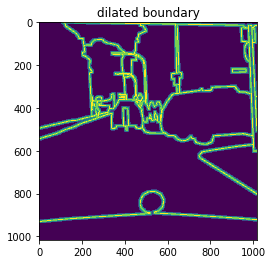

In [56]:
import glob
from skimage.segmentation import find_boundaries,mark_boundaries
import cv2
import matplotlib.pyplot as plt
files=glob.glob(os.path.join('dataset','vis','label*'))

img_suffix=('jpg','png','jpeg','bmp')
img_files=[f for f in files if f.endswith(img_suffix)]
print(img_files)
for f in img_files:
    img=cv2.imread(f,cv2.IMREAD_GRAYSCALE)

    marked_img=mark_boundaries(img,img,color=(1,0,0),mode='thick')
    save_f=os.path.join('output','boundary',os.path.basename(f))
    os.makedirs(os.path.dirname(save_f),exist_ok=True)
#     cv2.imwrite(save_f,(marked_img*255).astype(np.uint8))
    
    boundary=find_boundaries(img,mode='thick').astype(np.uint8)
    
    # convert boundary value=0
    cv_boundary=(boundary==0).astype(np.uint8)
    distance2boundary,distance_label=cv2.distanceTransformWithLabels(cv_boundary,
                                                                     distanceType=cv2.DIST_L2,
                                                                     maskSize=5,
                                                                     labelType=cv2.DIST_LABEL_PIXEL)
    plt.imshow(cv_boundary)
    plt.title('cv boundary')
    plt.show()
    plt.imshow(distance2boundary)
    plt.title('distance2boundary')
    plt.show()
    plt.imshow(distance_label)
    plt.title('distance label')
    plt.show()
    
    # show dilated boundary
    kernel = np.ones((5,5),np.uint8)
    boundary_binary=boundary.copy()
    for i in range(4):
        boundary_binary = cv2.dilate(boundary_binary,kernel,iterations = 1)
        boundary+=boundary_binary
    
    print(np.unique(boundary))
    save_f=os.path.join('output','edge_distance',os.path.basename(f))
    os.makedirs(os.path.dirname(save_f),exist_ok=True)
#     cv2.imwrite(save_f,boundary*50)
    plt.imshow(marked_img)
    plt.title('img boundary')
    plt.show()
    plt.imshow(boundary)
    plt.title('dilated boundary')
    plt.show()

In [57]:
print(np.unique(distance_label),distance_label.shape)

[    1     2     3 ... 22556 22557 22558] (1017, 1017)


# semantic segmentation dataset

In [47]:
from torchvision.datasets import VOCSegmentation,Cityscapes,CocoDetection,SBDataset
import matplotlib.pyplot as plt
from skimage.color import label2rgb
import os

dataset_name='SBD'
if dataset_name=='voc':
    dataset=VOCSegmentation(root=os.path.expanduser('~/cvdataset/VOC'),year='2012',image_set='train')
elif dataset_name=='cityscapes':
    dataset=Cityscapes(root=os.path.expanduser('~/cvdataset/Cityscapes/leftImg8bit_trainvaltest'),
                       split='train',mode='fine',target_type='semantic')
elif dataset_name=='SBD':
    dataset=SBDataset(root=os.path.expanduser('~/cvdataset/VOC/benchmark_RELEASE/dataset'),
                      image_set='train',mode='segmentation')
elif dataset_name=='coco':
    dataset=CocoDetection(root=os.path.expanduser('~/cvdataset/coco/images/train2014'),
                         annFile=os.path.expanduser('~/cvdataset/coco/annotations/instances_train2014.json'))
else:
    assert False

ValueError: Wrong image_set entered! Please use image_set="train" or image_set="val" or image_set="train_noval"

In [46]:
for i in range(3):
    img,target=dataset[i]
    img=np.array(img)

    if dataset_name=='coco':
        for obj in target:
            print(type(obj),obj.keys(),type(obj['segmentation'][0]))
            for cordinate in obj['segmentation']:
                print(cordinate)
        continue
    else:
        print(img.shape,target.shape)
        print(img.dtype,target.dtype)
        target=np.array(target)
        print(np.unique(target))
#     plt.imshow(img)
#     plt.show()
    plt.imshow(label2rgb(target,bg_color=(0,0,0),bg_label=0))
    plt.show()

<class 'dict'> dict_keys(['segmentation', 'area', 'iscrowd', 'image_id', 'bbox', 'category_id', 'id']) <class 'list'>
[500.49, 473.53, 599.73, 419.6, 612.67, 375.37, 608.36, 354.88, 528.54, 269.66, 457.35, 201.71, 420.67, 187.69, 389.39, 192.0, 19.42, 360.27, 1.08, 389.39, 2.16, 427.15, 20.49, 473.53]
<class 'dict'> dict_keys(['segmentation', 'area', 'iscrowd', 'image_id', 'bbox', 'category_id', 'id']) <class 'list'>
[357.03, 69.03, 311.73, 15.1, 550.11, 4.31, 631.01, 62.56, 629.93, 88.45, 595.42, 185.53, 513.44, 230.83, 488.63, 232.99, 437.93, 190.92, 429.3, 189.84, 434.7, 148.85, 410.97, 121.89, 359.19, 74.43, 358.11, 65.8]
<class 'dict'> dict_keys(['segmentation', 'area', 'iscrowd', 'image_id', 'bbox', 'category_id', 'id']) <class 'list'>
[249.6, 348.99, 267.67, 311.72, 291.39, 294.78, 304.94, 294.78, 326.4, 283.48, 345.6, 273.32, 368.19, 269.93, 385.13, 268.8, 388.52, 257.51, 393.04, 250.73, 407.72, 240.56, 425.79, 230.4, 441.6, 229.27, 447.25, 237.18, 447.25, 256.38, 456.28, 254.1